c:\Users\buzzr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\buzzr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


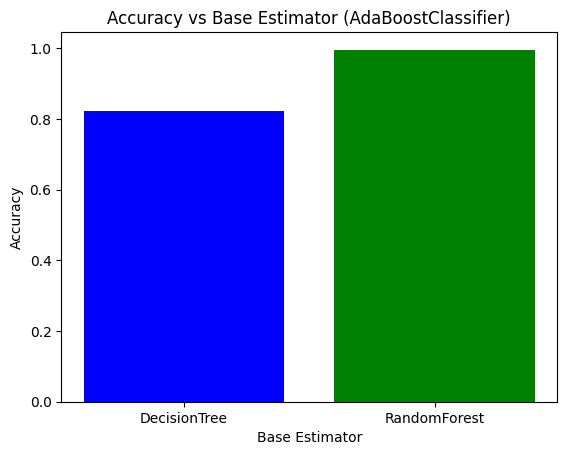

Base Estimators: ['DecisionTree', 'RandomForest']
Test Accuracies: [0.822, 0.996]


In [2]:
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

BASE_DIR = Path.cwd()
data = np.load("../Hyperparameters/yaleExtB_data.npy")
target = np.load("../Hyperparameters/yaleExtB_target.npy")

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=1/3)

accuracies = []
validation_scores = []  # Storing validation scores
base_estimators = ['DecisionTree', 'RandomForest']

for base_estimator in base_estimators:
    # Define base estimator
    if base_estimator == 'DecisionTree':
        base_estimator_model = DecisionTreeClassifier(max_depth=1, max_features='log2')
    elif base_estimator == 'RandomForest':
        base_estimator_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
        
    # Define and train AdaBoostClassifier with specified base estimator
    ada_clf = AdaBoostClassifier(base_estimator_model, n_estimators=500, learning_rate=1.0, algorithm='SAMME.R')
    ada_clf.fit(x_train, y_train)
    
    # Calculate accuracy on test set
    accuracy = ada_clf.score(x_test, y_test)
    accuracies.append(accuracy)
    
    # Calculate validation score on training set
    validation_score = ada_clf.score(x_train, y_train)
    validation_scores.append(validation_score)

plt.bar(base_estimators, accuracies, color=['blue', 'green'])
plt.xlabel('Base Estimator')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Base Estimator (AdaBoostClassifier)')
plt.show()

print(f"Base Estimators: {base_estimators}")
print(f"Test Accuracies: {accuracies}")
